# Clustering

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List
import numpy as np


def create_normal_distribution(mean: float, sd: float, size: int) -> np.array:
    """
    Crea una distribución normal.

    Args:
        mean (float): Media de la distribución.
        sd (float): Desviación estándar de la distribución.
        size (int): Tamaño de la muestra.

    Returns:
        np.array: Array con la distribución normal generada.
    """
    return np.random.normal(loc=mean, scale=sd, size=size)

def create_distribution(mean: float, size: int) -> pd.Series:
    """
    Crea una distribución basada en una media dada.

    Args:
        mean (float): Media de la distribución.
        size (int): Tamaño de la muestra.

    Returns:
        pd.Series: Serie de pandas con la distribución generada.
    """
    return create_normal_distribution(mean, mean * 0.25, size)

def generate_df(means: List[Tuple[float, float, str]], n: int) -> pd.DataFrame:
    """
    Genera un DataFrame con distribuciones para cada grupo especificado.

    Args:
        means (List[Tuple[float, float, str]]): Lista de tuplas con medias x, y y etiquetas.
        n (int): Tamaño de cada grupo.

    Returns:
        pd.DataFrame: DataFrame con columnas 'x', 'y' y 'label'.
    """
    lists = [
        (create_distribution(x, n), create_distribution(y, n), np.repeat(l, n))
        for x, y, l in means
    ]
    x = np.concatenate([x for x, _, _ in lists])
    y = np.concatenate([y for _, y, _ in lists])
    labels = np.concatenate([l for _, _, l in lists])
    return pd.DataFrame({"x": x, "y": y, "label": labels})

def get_cmap(n: int, name: str = "hsv"):
    """
    Obtiene un mapa de colores.

    Args:
        n (int): Número de colores distintos necesarios.
        name (str, optional): Nombre del mapa de colores. Por defecto "hsv".

    Returns:
        function: Función que mapea índices a colores RGB distintos.
    """
    return plt.colormaps.get_cmap(name)

def scatter_group_by(
    file_path: str,
    df: pd.DataFrame,
    x_column: str,
    y_column: str,
    label_column: str
):
    """
    Crea un gráfico de dispersión agrupado por etiquetas y lo guarda.

    Args:
        file_path (str): Ruta donde guardar la imagen.
        df (pd.DataFrame): DataFrame con los datos.
        x_column (str): Nombre de la columna para el eje x.
        y_column (str): Nombre de la columna para el eje y.
        label_column (str): Nombre de la columna de etiquetas.
    """
    fig, ax = plt.subplots()
    labels = pd.unique(df[label_column])
    cmap = get_cmap(len(labels) + 1)
    for i, label in enumerate(labels):
        filter_df = df[df[label_column] == label]
        ax.scatter(filter_df[x_column], filter_df[y_column], label=label)
    ax.legend()
    plt.set_cmap(cmap)
    plt.savefig(file_path)
    plt.show()
    plt.close()

def euclidean_distance(p_1: np.array, p_2: np.array) -> float:
    """
    Calcula la distancia euclidiana entre dos puntos.

    Args:
        p_1 (np.array): Primer punto.
        p_2 (np.array): Segundo punto.

    Returns:
        float: Distancia euclidiana entre los puntos.
    """
    return np.sqrt(np.sum((p_2 - p_1) ** 2))

def calculate_means(points: np.array, labels: np.array, clusters: int) -> np.array:
    """
    Calcula las medias de los clusters.

    Args:
        points (np.array): Array de puntos.
        labels (np.array): Array de etiquetas de cluster.
        clusters (int): Número de clusters.

    Returns:
        np.array: Array con las medias de los clusters.
    """
    return [np.mean(points[labels == k], axis=0) for k in range(clusters)]

def calculate_nearest_k(point: np.array, actual_means: List[np.array]) -> Tuple[np.array, int]:
    """
    Calcula el cluster más cercano a un punto.

    Args:
        point (np.array): Punto a evaluar.
        actual_means (List[np.array]): Lista de medias actuales de los clusters.

    Returns:
        Tuple[np.array, int]: Tupla con el punto y el índice del cluster más cercano.
    """
    distances = [euclidean_distance(mean, point) for mean in actual_means]
    nearest_k = np.argmin(distances)
    return (point, nearest_k)

def k_means(points: List[np.array], k: int):
    """
    Implementa el algoritmo K-means.

    Args:
        points (List[np.array]): Lista de puntos.
        k (int): Número de clusters.

    Returns:
        np.array: Array con las medias finales de los clusters.
    """
    N = len(points)
    num_cluster = k
    max_iterations = 15
    x = np.array(points)
    y = np.random.randint(0, num_cluster, N)
    mean = np.zeros((num_cluster, len(points[0])))

    for t in range(max_iterations):
        actual_mean = calculate_means(points=x, labels=y, clusters=num_cluster)
        y = np.array([calculate_nearest_k(point=point, actual_means=actual_mean)[1] for point in x])

        df_points = pd.DataFrame(x, columns=['x', 'y'])
        df_points['label'] = y.astype(str)
        df_mean = pd.DataFrame(actual_mean, columns=['x', 'y'])
        df_mean['label'] = 'centroid'
        df = pd.concat([df_points, df_mean])

        scatter_group_by(file_path=f"../img/cluster/kmeans_{t}.png", df=df, x_column="x", y_column="y", label_column='label')

        if np.array_equal(actual_mean, mean):
            break
        mean = actual_mean.copy()

    return mean

df:              x           y   label
0     19.898162   19.697565  grupo0
1     12.404879   21.054760  grupo0
2     12.859894   21.584281  grupo0
3     11.629611   18.109442  grupo0
4     18.600467   18.330689  grupo0
..          ...         ...     ...
145  174.795383  117.693051  grupo2
146  154.384755  178.155553  grupo2
147  150.678891  228.327033  grupo2
148  247.221693  161.009335  grupo2
149  167.562273  121.747994  grupo2

[150 rows x 3 columns]


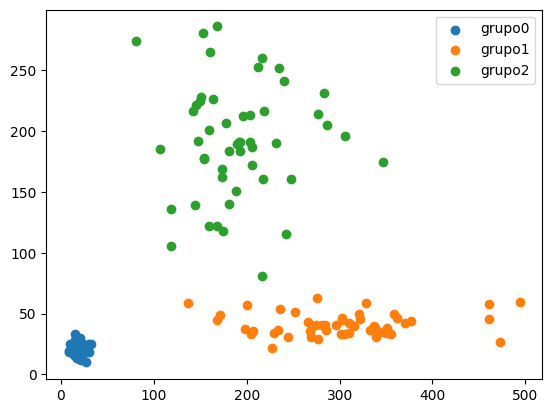

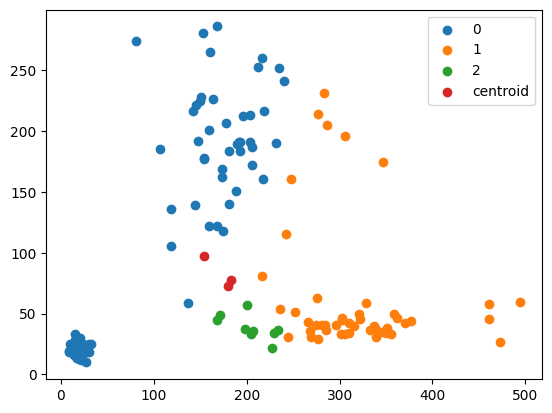

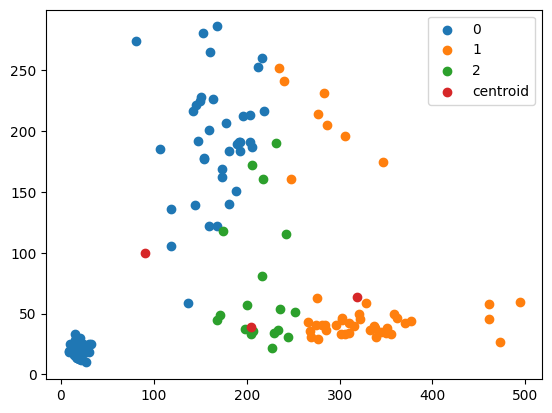

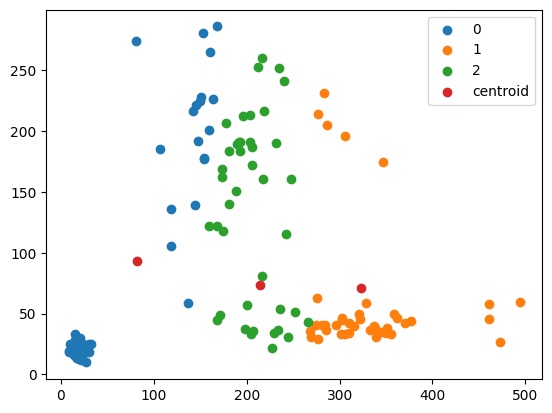

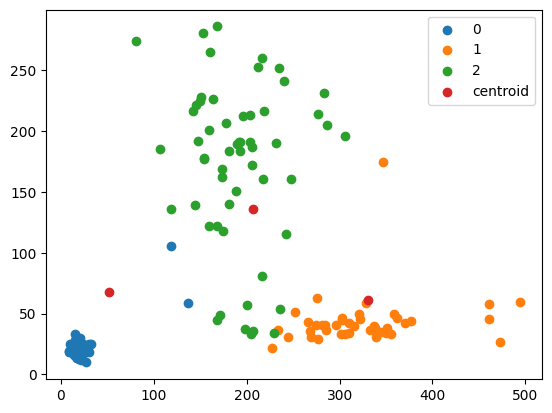

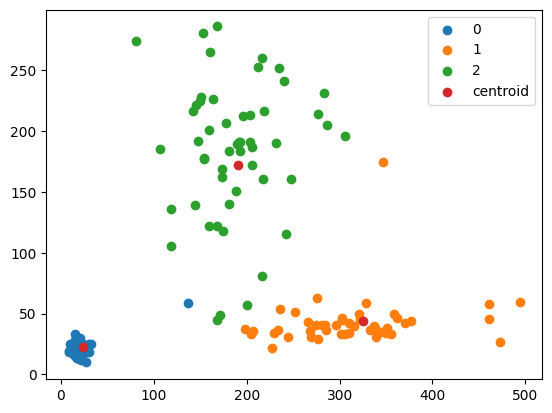

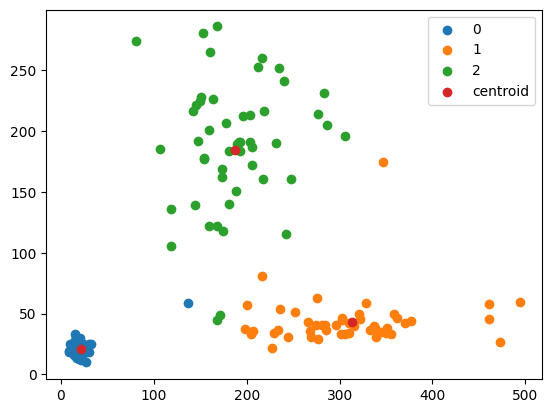

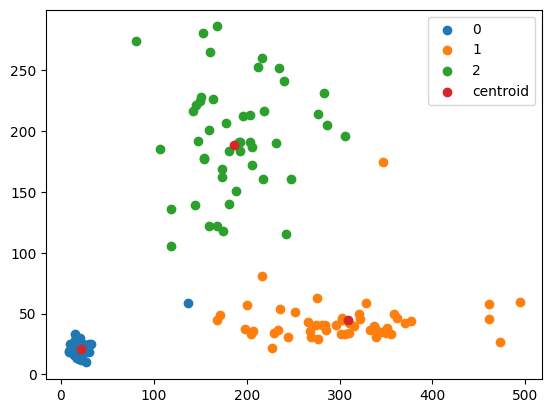

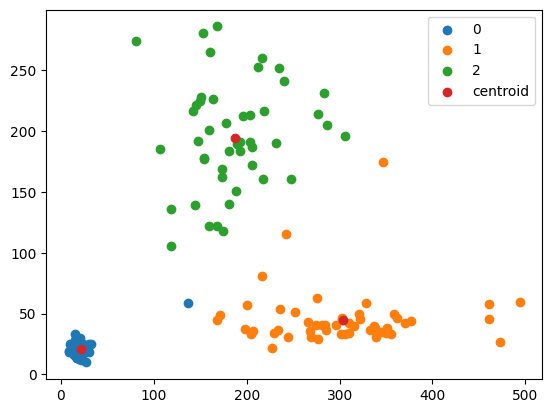

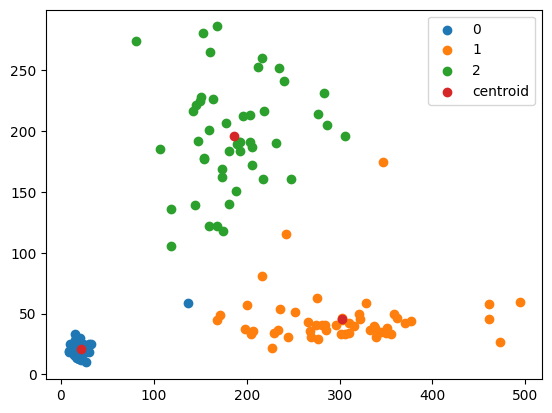

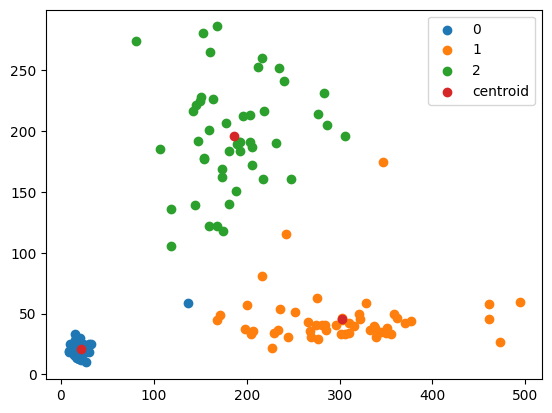

[array([21.37574174, 20.65981491]), array([302.16479783,  45.86723071]), array([186.06555535, 196.27837461])]


In [9]:
# Ejemplo de uso
groups = [(20, 20, "grupo0"), (300, 40, "grupo1"), (200, 200, "grupo2")]
df = generate_df(groups, 50)
print(f'df:{df}')

scatter_group_by("../img/cluster/clusters.png", df, "x", "y", "label")

list_t = [(np.array(tuples[0:2]), tuples[2]) for tuples in df.itertuples(index=False, name=None)]
points = [point for point, _ in list_t]

kn = k_means(points, 3)
print(kn)

# Método del codo - Elbow method

El método del codo (elbow method) es una técnica gráfica usada para determinar el número óptimo de clusters (grupos) en un análisis de clustering de k-means. Este método evalúa cómo la variación dentro de los clusters (también conocida como inercia o suma de los cuadrados dentro del cluster) disminuye a medida que se aumenta el número de clusters. A continuación, se describe el procedimiento y cómo funciona:

**Procedimiento del Método del Codo**

1.	**Ejecutar k-means con diferentes valores de k**:
    - Ejecuta el algoritmo k-means varias veces, cada vez con un número diferente de clusters (k). Por ejemplo, desde k=1 hasta k=10 o más, dependiendo del problema específico.
2.	**Calcular la inercia para cada k**:
    - La inercia es la suma de las distancias al cuadrado de cada punto a su centroide más cercano. Se calcula para cada valor de k.
3.	**Graficar la inercia vs. número de clusters**:
    - En el eje x de la gráfica se coloca el número de clusters (k) y en el eje y se coloca la inercia.
4.	**Identificar el “codo” en la gráfica**:
    - Observa la gráfica para identificar el punto donde la inercia deja de disminuir significativamente con el aumento de k. Este punto se conoce como el “codo” y sugiere el número óptimo de clusters.

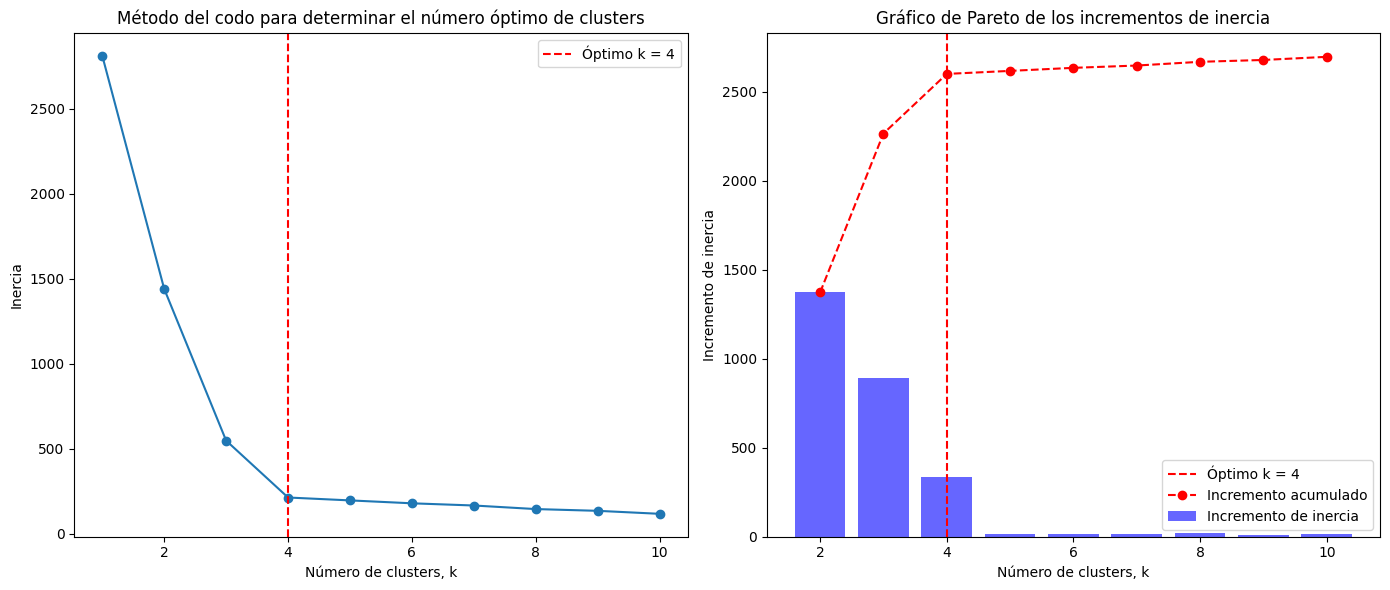

El mejor número de clusters (k) basado en el método del codo es: 4


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator

# Generar datos de ejemplo
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Lista para almacenar la inercia para cada valor de k
inertias = []

# Rango de valores de k a probar
k_range = range(1, 11)

for k in k_range:
    # Crear un modelo de KMeans con k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Ajustar el modelo a los datos
    kmeans.fit(X)
    
    # Almacenar la inercia
    inertias.append(kmeans.inertia_)

# Calcular los incrementos de inercia
inertia_diffs = np.diff(inertias)

# Calcular la tasa de incremento de inercia
inertia_rate_of_change = np.diff(inertia_diffs)

# Encontrar el índice del mayor incremento en la tasa de cambio
best_k_index = np.argmax(inertia_rate_of_change) + 1  # +1 porque np.diff reduce la longitud en 1

# Usar KneeLocator para encontrar el "codo" en la gráfica de inercia
kneedle = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
optimal_k_kneedle = kneedle.elbow

# Graficar el método del codo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.axvline(optimal_k_kneedle, color='r', linestyle='--', label=f'Óptimo k = {optimal_k_kneedle}')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.legend()

# Graficar el gráfico de Pareto de los incrementos de inercia
plt.subplot(1, 2, 2)
plt.bar(range(2, 11), np.abs(inertia_diffs), color='b', alpha=0.6, label='Incremento de inercia')
plt.axvline(optimal_k_kneedle, color='r', linestyle='--', label=f'Óptimo k = {optimal_k_kneedle}')
plt.xlabel('Número de clusters, k')
plt.ylabel('Incremento de inercia')
plt.title('Gráfico de Pareto de los incrementos de inercia')

# Añadir línea acumulativa
cumulative_increments = np.cumsum(np.abs(inertia_diffs))
plt.plot(range(2, 11), cumulative_increments, color='r', marker='o', linestyle='dashed', label='Incremento acumulado')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir la mejor k basada en el método del codo
print(f'El mejor número de clusters (k) basado en el método del codo es: {optimal_k_kneedle}')